<a href="https://colab.research.google.com/github/nlim23/MAT421/blob/main/MODULEB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Lagrange Polynomial Interpolation
The Lagrange Polynomial interpolation, L(x) such that L$(x_i) = y_i$, is better than the cubic polynomials, this one finds a single polynomial that goes through all the data points.

In [ ]:
from scipy.interpolate import lagrange
f = lagrange(x, y)

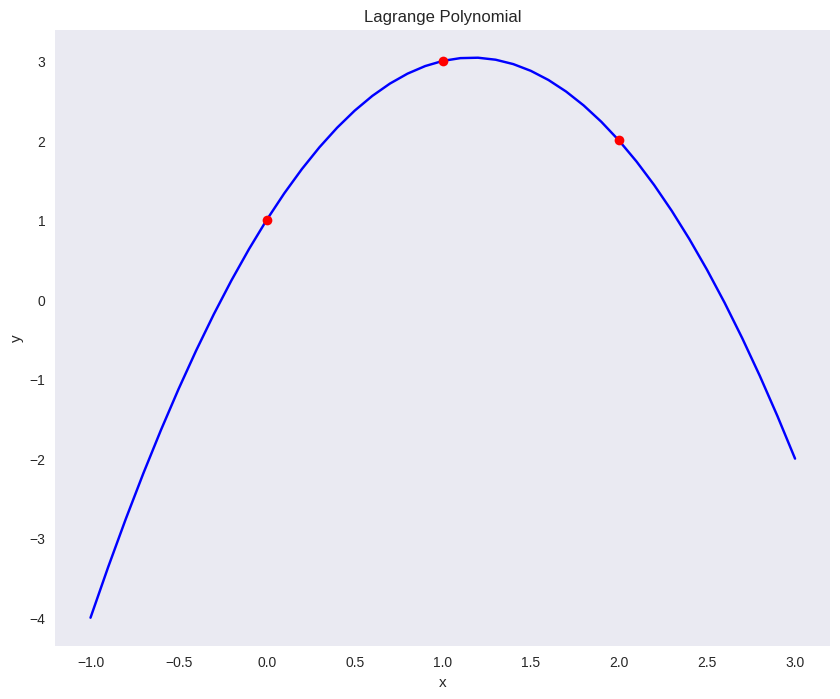

In [ ]:
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

##Newton's Polynomial Interpolation
This interpolation is another method of fitting data points exactly onto the function.

f(x) = $∑^n_{i=0} a_in_i(x)$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")

%matplotlib inline

In [3]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y

    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial
    at x
    '''
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

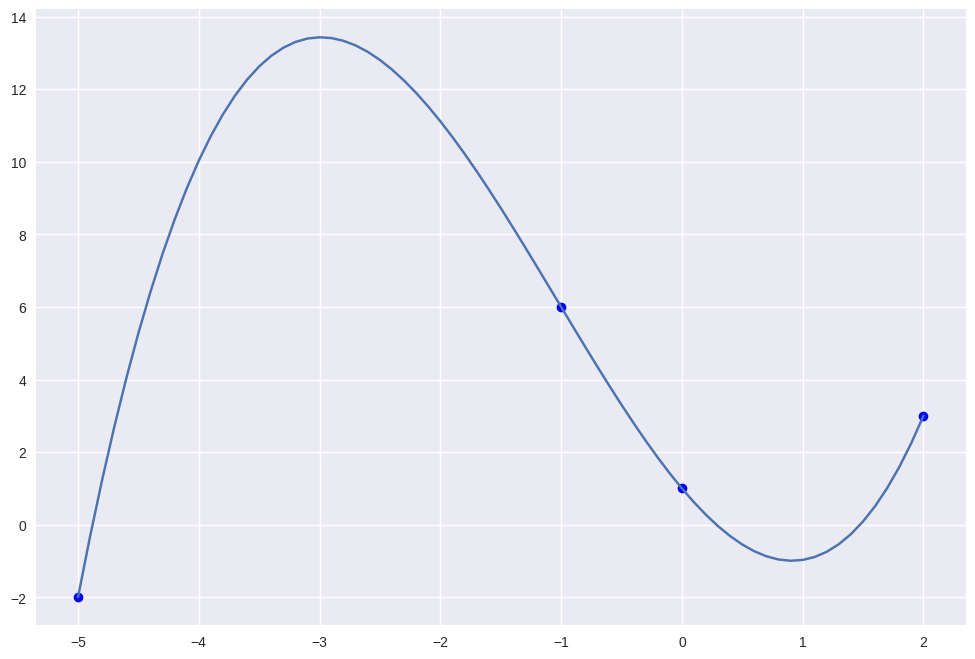

In [4]:
x = np.array([-5, -1, 0, 2])
y = np.array([-2, 6, 1, 3])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)